In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV , LassoCV, Ridge , Lasso
import scipy.stats as st

In [69]:
df = pd.read_csv('train (1).csv')
df1 = pd.read_csv('test (2).csv')
sample_submission_df = pd.read_csv('sampleSubmission.csv')
print(df.shape)
df

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [70]:
df1.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [71]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [72]:
df['datetime'].value_counts()

2011-07-11 13:00:00    1
2011-01-16 00:00:00    1
2011-09-11 10:00:00    1
2012-10-18 20:00:00    1
2012-01-13 11:00:00    1
                      ..
2011-09-04 08:00:00    1
2012-10-16 14:00:00    1
2011-06-11 13:00:00    1
2012-04-18 05:00:00    1
2012-06-17 00:00:00    1
Name: datetime, Length: 10886, dtype: int64

In [73]:
columns =list(df1)
df_new = df[columns]
all_data=pd.concat((df_new,df1))
print(df.shape, df1.shape, all_data.shape)

(10886, 12) (6493, 9) (17379, 9)


In [74]:
all_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [75]:
all_data['time'] = pd.DatetimeIndex(all_data['datetime']).hour
all_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,1


In [76]:
all_data['dayofweek'] = pd.DatetimeIndex(all_data['datetime']).dayofweek
all_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,1,5


In [77]:
all_data['weekend']=(all_data['dayofweek']==5) | (all_data['dayofweek']==6)

In [78]:
all_data = all_data.drop('datetime',axis = 1)

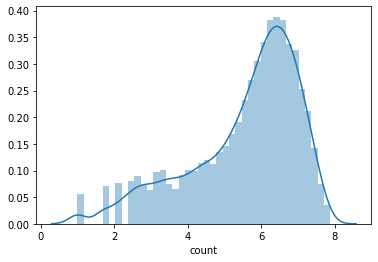

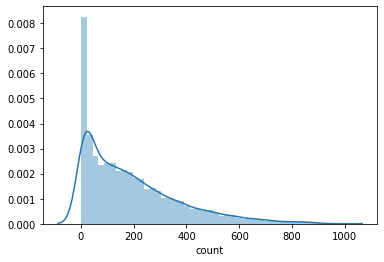

In [79]:
sns.distplot(np.log(df['count'])+1)
plt.show()
sns.distplot(df['count'])
plt.show()

In [80]:
(np.log(df['count'])+1).isnull().sum()

0

In [81]:
#sns.pairplot(df)

In [82]:
all_data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time,dayofweek,weekend
season,1.000000,-0.009585,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,-0.006117,-0.007448,-0.010581
holiday,-0.009585,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.000479,-0.188924,-0.109599
workingday,0.013743,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.002285,-0.702419,-0.934105
weather,-0.014524,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.020203,-0.046424,-0.039604
temp,0.312025,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.137603,-0.036220,-0.046813
atemp,0.319380,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.133750,-0.038918,-0.044730
humidity,0.150625,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.276498,-0.035233,-0.012208
windspeed,-0.149773,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.137252,0.003274,0.010681
time,-0.006117,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,1.000000,-0.002893,-0.002524
dayofweek,-0.007448,-0.188924,-0.702419,-0.046424,-0.036220,-0.038918,-0.035233,0.003274,-0.002893,1.000000,0.791267


 Variance explained after PCA : [0.99388034]


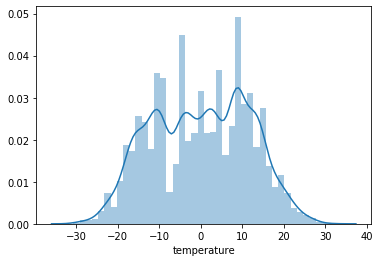

In [84]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
pca.fit(all_data[['temp', 'atemp']])
print(f" Variance explained after PCA : {pca.explained_variance_ratio_}")
all_data['temperature']=pca.fit_transform(all_data[['temp','atemp']])
sns.distplot(all_data['temperature'])

In [17]:
all_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time,dayofweek,weekend,temperature
0,1,0,0,1,9.84,14.395,81,0.0,0,5,True,-14.045296
1,1,0,0,1,9.02,13.635,80,0.0,1,5,True,-15.159684
2,1,0,0,1,9.02,13.635,80,0.0,2,5,True,-15.159684
3,1,0,0,1,9.84,14.395,75,0.0,3,5,True,-14.045296
4,1,0,0,1,9.84,14.395,75,0.0,4,5,True,-14.045296


In [18]:
all_data = all_data.drop(['temp','atemp'],axis =1)

 Variance explained after PCA : [0.89401432]


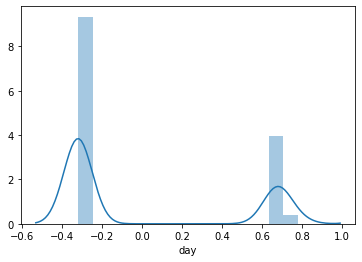

In [19]:
pca_day =PCA(n_components=1)
pca_day.fit(all_data[['holiday', 'workingday']])
print(f" Variance explained after PCA : {pca_day.explained_variance_ratio_}")
all_data['day']=pca.fit_transform(all_data[['holiday', 'workingday']])
sns.distplot(all_data['day'])

In [20]:
all_data['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [21]:
c = df.groupby(by='season')
c1 = c.get_group(4)
c2 = c.get_group(3)
c3 = c.get_group(2)
c4 = c.get_group(1)

In [22]:
from scipy.stats import f_oneway, ttest_ind
f_oneway(c1['count'],c2['count'],c3['count'],c4['count'])

F_onewayResult(statistic=236.94671081032104, pvalue=6.164843386499654e-149)

- Reject the null hypothesis : => can use this as Potential Variable !!!

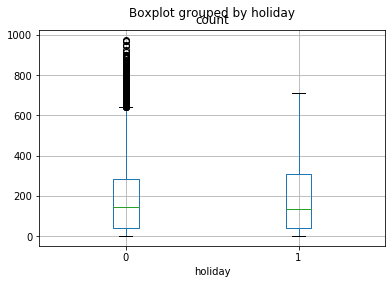

In [23]:
df.boxplot(column = 'count', by = 'holiday')

In [24]:
h = df.groupby(by='holiday')
h1 = h.get_group(1)
h0 = h.get_group(0)

In [25]:
ttest_ind(h1['count'], h0['count'])

Ttest_indResult(statistic=-0.5626388963477119, pvalue=0.5736923883271103)

- NOT a Potential Variable to fit a linear Model !

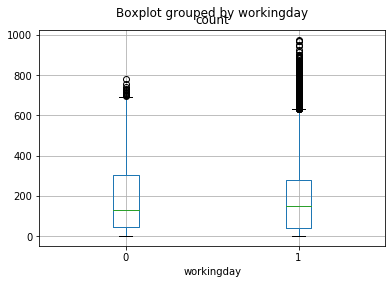

In [26]:
df.boxplot(column = 'count', by = 'workingday')

In [27]:
w = df.groupby(by='workingday')
w1 = w.get_group(1)
w0 = w.get_group(0)

In [28]:
ttest_ind(w1['count'], w0['count'])

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

NOT a Potential Variable to fit a linear Model !

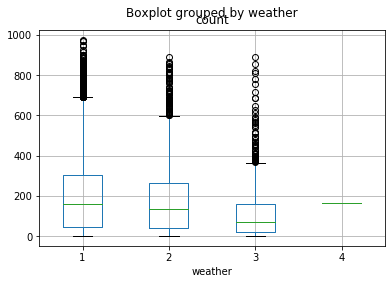

In [29]:
df.boxplot(column = 'count', by = 'weather')

In [30]:
wh = df.groupby(by='weather')
wh1 = wh.get_group(4)
wh2 = wh.get_group(3)
wh3 = wh.get_group(2)
wh4 = wh.get_group(1)

In [31]:
f_oneway(wh1['count'],wh2['count'],wh3['count'],wh4['count'])

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

- It is a potential variable

In [32]:
all_data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'humidity', 'windspeed',
       'time', 'dayofweek', 'weekend', 'temperature', 'day'],
      dtype='object')

In [33]:
all_data = all_data.drop(['holiday','workingday'], axis = 1)

In [34]:
all_data.columns

Index(['season', 'weather', 'humidity', 'windspeed', 'time', 'dayofweek',
       'weekend', 'temperature', 'day'],
      dtype='object')

In [35]:
#sns.pairplot(df)

In [36]:
all_data.corr()

,season,weather,humidity,windspeed,time,dayofweek,weekend,temperature,day
season,1.000000,-0.014524,0.150625,-0.149773,-0.006117,-0.007448,-0.010581,0.316986,-0.013958
weather,-0.014524,1.000000,0.418130,0.026226,-0.020203,-0.046424,-0.039604,-0.104546,-0.044855
humidity,0.150625,0.418130,1.000000,-0.290105,-0.276498,-0.035233,-0.012208,-0.060321,-0.015920
windspeed,-0.149773,0.026226,-0.290105,1.000000,0.137252,0.003274,0.010681,-0.044534,0.011859
time,-0.006117,-0.020203,-0.276498,0.137252,1.000000,-0.002893,-0.002524,0.135929,-0.002245
dayofweek,-0.007448,-0.046424,-0.035233,0.003274,-0.002893,1.000000,0.791267,-0.037800,0.688562
weekend,-0.010581,-0.039604,-0.012208,0.010681,-0.002524,0.791267,1.000000,-0.045823,0.920865
temperature,0.316986,-0.104546,-0.060321,-0.044534,0.135929,-0.037800,-0.045823,1.000000,-0.055699
day,-0.013958,-0.044855,-0.015920,0.011859,-0.002245,0.688562,0.920865,-0.055699,1.000000


In [37]:
all_data.tail(3)

,season,weather,humidity,windspeed,time,dayofweek,weekend,temperature,day
6490,1,1,60,11.0014,21,0,False,-14.606960,-0.318557
6491,1,1,56,8.9981,22,0,False,-14.050731,-0.318557
6492,1,1,65,8.9981,23,0,False,-14.050731,-0.318557


In [38]:
all_data = pd.get_dummies(all_data, columns = ['season','weather','weekend'])
all_data.head()

,humidity,windspeed,time,dayofweek,temperature,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,weekend_False,weekend_True
0,81,0.0,0,5,-14.045296,0.67618,1,0,0,0,1,0,0,0,0,1
1,80,0.0,1,5,-15.159684,0.67618,1,0,0,0,1,0,0,0,0,1
2,80,0.0,2,5,-15.159684,0.67618,1,0,0,0,1,0,0,0,0,1
3,75,0.0,3,5,-14.045296,0.67618,1,0,0,0,1,0,0,0,0,1
4,75,0.0,4,5,-14.045296,0.67618,1,0,0,0,1,0,0,0,0,1


In [39]:
Ytrain = df['count']

______________________________________________________

In [40]:
Xtrain=all_data[:len(df)]
Xtest=all_data[len(df):]
Ytrain=np.log(Ytrain+1)
print(Xtrain.shape, Ytrain.shape, Xtest.shape)

(10886, 16) (10886,) (6493, 16)


In [41]:
#pip install lightgbm

In [61]:
Xtest_scaled = sc.fit_transform(Xtest)
Xtest_scaled

array([[-0.42117208,  1.62088819, -1.67178498, ..., -0.01755332,
         0.63146697, -0.63146697],
       [-0.42117208, -1.53113921, -1.52710892, ..., -0.01755332,
         0.63146697, -0.63146697],
       [-0.42117208, -1.53113921, -1.38243286, ..., -0.01755332,
         0.63146697, -0.63146697],
       ...,
       [-0.21383123, -0.19755792,  1.36641221, ..., -0.01755332,
         0.63146697, -0.63146697],
       [-0.42117208, -0.44039641,  1.51108827, ..., -0.01755332,
         0.63146697, -0.63146697],
       [ 0.04534483, -0.44039641,  1.65576433, ..., -0.01755332,
         0.63146697, -0.63146697]])

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain_scaled = sc.fit_transform(Xtrain)
X1 = sm.add_constant(Xtrain_scaled)

In [44]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
LR = sm.OLS(Ytrain, X1).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     756.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:30:22   Log-Likelihood:                -15752.
No. Observations:               10886   AIC:                         3.153e+04
Df Residuals:                   10872   BIC:                         3.163e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5914      0.010    465.478      0.000       4.572       4.611
x1            -0.2759      0.012    -22.391      0.000      -0.300      -0.252
x2             0.0306      0.011      2.882      0.004       0.010       0.051
x3             0.6654      0.011     63.031      0.000       0.645       0.686
x4             0.0660      0.017      3.992      0.000       0.034       0.098
x5             0.4798      0.017     28.929      0.000       0.447       0.512
x6             0.0162      0.026      0.626      0.531      -0.034       0.067
x7            -0.0702      0.011     -6.656      0.000      -0.091      -0.050
x8            -0.0143      0.008     -1.834      0.067      -0.030       0.001
x9            -0.0766      0.011     -7.072      0.000      -0.098      -0.055
x10            0.1606      0.008     19.934      0.000       0.145       0.176
x11           -0.0140      0.006     -2.369      0.018      -0.026      -0.002
x12            0.0578      0.006      9.283      0.000       0.046       0.070
x13           -0.0699      0.009     -7.797      0.000      -0.087      -0.052
x14            0.0118      0.010      1.198      0.231      -0.008       0.031
x15            0.0135      0.015      0.881      0.378      -0.017       0.044
x16           -0.0135      0.015     -0.881      0.378      -0.044       0.017
==============================================================================
Omnibus:                       66.306   Durbin-Watson:                   0.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.401
Skew:                          -0.193   Prob(JB):                     2.31e-15
Kurtosis:                       3.016   Cond. No.                     1.31e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
import warnings 
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

- KNN regressor

In [176]:
#from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [46]:
knn = KNeighborsRegressor()
knn_params = {'n_neighbors': np.arange(3,200), 'weights': ['uniform','distance']}
GS = GridSearchCV(knn, knn_params,cv = 10, scoring = 'neg_mean_squared_log_error' )
GS.fit(Xtrain_scaled, Ytrain)
GS.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

- DT Regressor

In [48]:
dt = DecisionTreeRegressor(random_state = 0)
dt_params = {'max_depth': np.arange(3,100), 'min_samples_leaf' : np.arange(2,100) }
GS_dt = GridSearchCV(dt, dt_params,cv = 10, scoring = 'neg_mean_squared_log_error' )
GS_dt.fit(Xtrain_scaled, Ytrain)
GS_dt.best_params_ 

{'max_depth': 11, 'min_samples_leaf': 6}

In [112]:
KNN = KNeighborsRegressor(n_neighbors = 6, weights = 'distance')
DT = DecisionTreeRegressor(max_depth = 11, min_samples_leaf = 6, random_state = 0)
RF = RandomForestRegressor(n_estimators = 5, random_state = 0)
AB_RF = AdaBoostRegressor(base_estimator = RF, n_estimators = 96, random_state = 0)
GBoost = GradientBoostingRegressor(n_estimators = 99) 
Bag = BaggingRegressor(base_estimator = RF,n_estimators = 6)

In [113]:
models1 = []
models1.append(('KNNRegressor', KNN ))
models1.append(('DTRegressor', DT))
models1.append(('RFRegressor', RF))
models1.append(('ADABoostRegressor',AB_RF))
models1.append(('GradientBoostRegressor',GBoost))
models1.append(('BaggingRegressor', Bag))

In [114]:
from sklearn import model_selection
results = []
names = []
for name,model in models1:
    kfold = model_selection.KFold(shuffle = True, n_splits = 10,random_state = 0)
    cv_results = model_selection.cross_val_score(model,Xtrain_scaled, Ytrain, cv = kfold, scoring = 'neg_mean_squared_log_error')
    #print(cv_results)
    results.append(np.sqrt(np.abs(cv_results))) # every fold, RMSE scores... only for plotting purposes
    names.append(name)
    print("%s:%f(%f)" %(name, np.mean(np.sqrt(np.abs(cv_results))), 
                        np.std(np.sqrt(np.abs(cv_results)), ddof = 1)))

KNNRegressor:0.170216(0.006980)
DTRegressor:0.108027(0.004494)
RFRegressor:0.102521(0.003896)
ADABoostRegressor:0.092453(0.005769)
GradientBoostRegressor:0.103203(0.005541)
BaggingRegressor:0.094815(0.005688)


In [87]:
from sklearn.ensemble import VotingRegressor
stacked = VotingRegressor(estimators = [('RFRegressor', RF ), ('KNNRegressor',KNN)])

In [88]:
models = []
models.append(('VotingRegressor', stacked))

In [89]:
for name,model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits = 17,random_state = 0)
    cv_results = model_selection.cross_val_score(model, X_scaled, y, cv = kfold, scoring = 'neg_mean_squared_log_error')
    #print(cv_results)
    results.append(np.sqrt(np.abs(cv_results))) # every fold, RMSE scores... only for plotting purposes
    names.append(name)
    print("%s:%f(%f)" %(name, np.mean(np.sqrt(np.abs(cv_results))), 
                        np.std(np.sqrt(np.abs(cv_results)), ddof = 1)))

VotingRegressor:1.242761(0.056331)


### Tuning 
- for Variance error for Bagged Models
- for Bias error in boosting models

In [53]:
RF_var = []
for val in np.arange(1,100):
    rf = RandomForestRegressor(n_estimators = val, random_state = 0)
    kfold = model_selection.KFold(shuffle = True, n_splits = 10,random_state = 0)
    cv_results = model_selection.cross_val_score(rf,Xtrain_scaled, Ytrain, cv = kfold, scoring = 'neg_mean_squared_log_error')
    RF_var.append(np.var(cv_results,ddof = 1))

In [54]:
np.argmin(RF_var)

4

In [94]:
bag_var = []
for val in np.arange(1,100):
    BAG = BaggingRegressor(base_estimator = RF, n_estimators = val, random_state = 0)
    kfold = model_selection.KFold(shuffle = True, n_splits = 10,random_state = 0)
    cv_results = model_selection.cross_val_score(BAG, Xtrain_scaled, Ytrain, cv = kfold, scoring = 'neg_mean_squared_log_error')
    bag_var.append(np.var(cv_results,ddof = 1))

In [95]:
np.argmin(bag_var)

5

In [86]:
((1.289310-1.219913)/1.289310)*100

5.382491410134098

In [85]:
((0.035703-0.028980)/0.035703)*100

18.830350390723467

In [186]:
X

,temp,humidity,windspeed,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,81,0.0000,5,1,0,0,0,1,0,0,0
1,9.02,80,0.0000,5,1,0,0,0,1,0,0,0
2,9.02,80,0.0000,5,1,0,0,0,1,0,0,0
3,9.84,75,0.0000,5,1,0,0,0,1,0,0,0
4,9.84,75,0.0000,5,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,50,26.0027,2,0,0,0,1,1,0,0,0
10882,14.76,57,15.0013,2,0,0,0,1,1,0,0,0
10883,13.94,61,15.0013,2,0,0,0,1,1,0,0,0
10884,13.94,61,6.0032,2,0,0,0,1,1,0,0,0


In [58]:
RF.fit(Xtrain_scaled, Ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [191]:
X.head()

,temp,humidity,windspeed,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,81,0.0,5,1,0,0,0,1,0,0,0
1,9.02,80,0.0,5,1,0,0,0,1,0,0,0
2,9.02,80,0.0,5,1,0,0,0,1,0,0,0
3,9.84,75,0.0,5,1,0,0,0,1,0,0,0
4,9.84,75,0.0,5,1,0,0,0,1,0,0,0


In [196]:
df1.head()

,season,weather,temp,humidity,windspeed,dayofweek
0,1,1,10.66,56,26.0027,3
1,1,1,10.66,56,0.0000,3
2,1,1,10.66,56,0.0000,3
3,1,1,10.66,56,11.0014,3
4,1,1,10.66,56,11.0014,3


In [198]:
#df1['dayofweek'] = pd.DatetimeIndex(df1['datetime']).dayofweek
#df1 = df1.drop(['datetime','holiday','workingday','atemp'], axis = 1)
df1 = pd.get_dummies(df1, columns = ['season','weather'])
df1.head()

,temp,humidity,windspeed,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,10.66,56,26.0027,3,1,0,0,0,1,0,0,0
1,10.66,56,0.0000,3,1,0,0,0,1,0,0,0
2,10.66,56,0.0000,3,1,0,0,0,1,0,0,0
3,10.66,56,11.0014,3,1,0,0,0,1,0,0,0
4,10.66,56,11.0014,3,1,0,0,0,1,0,0,0


In [208]:
df1_scaled = sc.fit_transform(df1)

In [63]:
RF.fit(Xtrain_scaled, Ytrain)
log_predictions= RF.predict(Xtest_scaled)
predictions=np.exp(log_predictions)-1
sample_submission_df['count']=predictions
sample_submission_df.to_csv('Result_new.csv', index=False)
sample_submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,19.852246
1,2011-01-20 01:00:00,5.015201
2,2011-01-20 02:00:00,4.206265
3,2011-01-20 03:00:00,2.981072
4,2011-01-20 04:00:00,1.825235


- Boosting Tuning

In [103]:
Ada_bias = []
for val in np.arange(1,100):
    AdA = AdaBoostRegressor(base_estimator = RF, n_estimators = val, random_state = 0)
    kfold = model_selection.KFold(shuffle = True, n_splits = 10,random_state = 0)
    cv_results = model_selection.cross_val_score(AdA, Xtrain_scaled, Ytrain, cv = kfold, scoring = 'neg_mean_squared_log_error')
    Ada_bias.append(1- np.mean(cv_results))

In [104]:
np.argmin(Ada_bias)

95

In [109]:
AB_RF.fit(Xtrain_scaled, Ytrain)
log_predictions= AB_RF.predict(Xtest_scaled)
predictions=np.exp(log_predictions)-1
sample_submission_df['count']=predictions
sample_submission_df.to_csv('Result_Ada.csv', index=False)
sample_submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,14.131127
1,2011-01-20 01:00:00,6.003412
2,2011-01-20 02:00:00,7.557808
3,2011-01-20 03:00:00,3.855934
4,2011-01-20 04:00:00,2.890043


In [110]:
GB_bias = []
for val in np.arange(1,100):
    GBoost = GradientBoostingRegressor(n_estimators = val , random_state = 0)
    #AdA = AdaBoostRegressor(base_estimator = RF, n_estimators = val, random_state = 0)
    kfold = model_selection.KFold(shuffle = True, n_splits = 10,random_state = 0)
    cv_results = model_selection.cross_val_score(GBoost, Xtrain_scaled, Ytrain, cv = kfold, scoring = 'neg_mean_squared_log_error')
    GB_bias.append(1- np.mean(cv_results))

In [111]:
np.argmin(GB_bias)

98